In [1]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Ivan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
x_val = x_train[40000:]
x_train = x_train[:40000]

print(x_val.shape)
y_val = y_train[40000:]
y_train = y_train[:40000]
y_val = to_categorical(y_val)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

listOfAllSamples = np.concatenate((x_train,x_val,x_test))
print(listOfAllSamples.shape)

predictedList = []


(10000, 32, 32, 3)
(40000, 10)
(60000, 32, 32, 3)


# Skip to load model if you dont want to train a model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),strides=1,padding="same",use_bias=True ,bias_initializer="zeros",kernel_initializer="lecun_uniform",activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None,padding="same"))

model.add(Conv2D(64, kernel_size=(3, 3),strides=1,padding="same",use_bias=True ,bias_initializer="zeros",kernel_initializer="lecun_uniform",activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3),strides=1,padding="same",use_bias=True ,bias_initializer="zeros",kernel_initializer="lecun_uniform",activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None,padding="same"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
__________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'],)

history = model.fit(x_train, y_train, batch_size=2048, epochs=75,validation_data=(x_val,y_val))


Train on 40000 samples, validate on 10000 samples
Epoch 1/75
40000/40000 [==============================] - 23s 573us/step - loss: 2.1484 - acc: 0.1971 - val_loss: 1.8757 - val_acc: 0.3246

In [10]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

10000/10000 [==============================] - 2s 220us/step

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


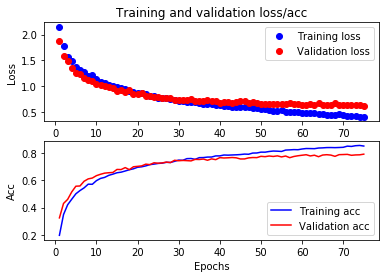

In [11]:
import matplotlib.pyplot as plt
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history["acc"]
val_acc = history.history["val_acc"]
epochs = range(1, len(loss) + 1)
plt.subplot(2,1,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss/acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,1,2)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [12]:
model.save("75epoch.h5")

# Load model

In [3]:
model = keras.models.load_model("75epoch.h5")

In [4]:
model.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
__________

In [5]:
def predictAll():
    if not predictedList:
        a = model.predict(listOfAllSamples)

        print(len(a))
        predictedList.append(a)

    else:
        print("Loading list of predictions")
def reshape(pic):
    return (pic.reshape(1, 32,32,3))
def dist (pic1,pic2):
    return np.linalg.norm(pic1-pic2)

#Returns numpy image at size imageSize*imageSize
def getProcessedData(img,imageSize):
    img = img.resize((imageSize,imageSize), resample=Image.ANTIALIAS)
    imgData = np.asarray(img, dtype=np.uint8).reshape(imageSize,imageSize,3)
    imgData = imgData/255.
    return imgData

#Returns numpy image at size imageSize*imageSize
def getImageData(filename,imageSize):
    img = Image.open(filename)
    imgData = getProcessedData(img, imageSize)
    return imgData

In [6]:
predictAll()
print(predictedList[0].shape)

60000
(60000, 512)


In [7]:
def findBestPictures(fileLocation,numberOfBest):
    encoding = getImageData(fileLocation, 32) #picture to (32,32,3)
    encoding = encoding.reshape(1, 32,32,3) #reshape to (1,32,32,3)
    inputPredict = model.predict(encoding) #predict of size (512,1)
    
    listOfDistances = [] 
    for pred in predictedList[0]:
        listOfDistances.append(dist(pred,inputPredict)) #calculate L2 distance between given picture and all pictures in dataset

    ind = listOfDistances.index(min(listOfDistances)) #sort
    npList = np.array(listOfDistances) 
    sortedList = npList.argsort()[:numberOfBest] #picking best pictures
    
    br = 1

    for ind in sortedList:
        best = (listOfAllSamples[ind])
        plt.imsave(fileLocation[:-4]+"_best_"+str(br)+".jpg",best) #saving pictures
        plt.close()
        br = br+1
   

In [8]:
fileLocation = "C:/Users/Ivan/Desktop/ML/Book/TestImages/skoda.jpg" #add location
numberOfBest = 11
findBestPictures(fileLocation,numberOfBest)